In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import CategoricalAccuracy, AUC
import matplotlib.pyplot as plt

In [2]:
# Loading the data to a pandas DataFrame object:
dataset = pd.read_csv("cover_data.csv")

# print(dataset.info())
# print(dataset['class'].value_counts())

x = dataset.iloc[:, :-1] # extract the features columns
y = dataset.iloc[:, -1] # extract the label column "class"

In [5]:
# Data preprocessing.
# Splitting the data into training features, test features, training labels, and test labels, respectively:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y, random_state = 42)

# Initializing a ColumnTransformer object to scale the numeric features in the dataset:
ct = ColumnTransformer([("only numeric", StandardScaler(), x.columns)])
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [7]:
# Prepare labels for classification.
# The following code initializes an instance of LabelEncoder
# to encode the labels into integers:
le = LabelEncoder()
y_train = le.fit_transform(y_train.astype('str'))
y_test = le.transform(y_test.astype('str'))
# The following code transforms the encoded labels into a binary vector:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Designing the model.
model = Sequential()
model.add(InputLayer(input_shape = (x_train.shape[1],)))
model.add(Dense(64, activation = 'relu')) # a hidden layer with 64 neurons
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax')) # an output layer with the number of neurons corresponding to the number of classes

opt = Adam(learning_rate = 0.01)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = opt,
    metrics = [CategoricalAccuracy(), AUC()]
)

In [9]:
# Train and evaluate the model.
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 128,
    verbose = 1,
    callbacks = [es]
)

Epoch 1/10
2433/2433 [==============================] - 11s 4ms/step - loss: 0.5811 - categorical_accuracy: 0.7512 - auc: 0.9683 - val_loss: 0.5297 - val_categorical_accuracy: 0.7706 - val_auc: 0.9734
Epoch 2/10
2433/2433 [==============================] - 9s 4ms/step - loss: 0.4982 - categorical_accuracy: 0.7866 - auc: 0.9764 - val_loss: 0.4924 - val_categorical_accuracy: 0.7925 - val_auc: 0.9769
Epoch 3/10
2433/2433 [==============================] - 9s 4ms/step - loss: 0.4646 - categorical_accuracy: 0.8036 - auc: 0.9794 - val_loss: 0.4521 - val_categorical_accuracy: 0.8089 - val_auc: 0.9805
Epoch 4/10
2433/2433 [==============================] - 9s 4ms/step - loss: 0.4479 - categorical_accuracy: 0.8123 - auc: 0.9808 - val_loss: 0.4427 - val_categorical_accuracy: 0.8168 - val_auc: 0.9814
Epoch 5/10
2433/2433 [==============================] - 9s 4ms/step - loss: 0.4376 - categorical_accuracy: 0.8200 - auc: 0.9818 - val_loss: 0.4296 - val_categorical_accuracy: 0.8251 - val_auc: 0.9823

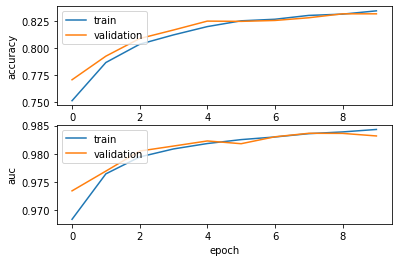

In [10]:
# plotting categorical and validation accuracy over epochs:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'], label = 'train')
ax1.plot(history.history['val_categorical_accuracy'], label = 'validation')
ax1.set_ylabel('accuracy')
ax1.legend(loc = 'upper left')

# plotting auc and validation auc over epochs:
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'], label = 'train')
ax2.plot(history.history['val_auc'], label = 'validation')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(loc = 'upper left')

plt.show()

In [11]:
loss, categorical_accuracy, auc = model.evaluate(x_test, y_test, verbose = 0)
print(f'accuracy: {categorical_accuracy}, auc: {auc}')

accuracy: 0.8310680389404297, auc: 0.9831830263137817
